Flight Price Prediction

Problem Statement:

Flight ticket prices can be something hard to guess, today we might see a price, check out the price of the same flight tomorrow, it will be a different story. We might have often heard travellers saying that flight ticket prices are so unpredictable. Here you will be provided with prices of flight tickets for various airlines between the months of March and June of 2019 and between various cities.

Size of training set: 10683 records

Size of test set: 2671 records

FEATURES:

Airline: The name of the airline.

Date_of_Journey: The date of the journey

Source: The source from which the service begins.

Destination: The destination where the service ends.

Route: The route taken by the flight to reach the destination.

Dep_Time: The time when the journey starts from the source.

Arrival_Time: Time of arrival at the destination.

Duration: Total duration of the flight.

Total_Stops: Total stops between the source and destination.

Additional_Info: Additional information about the flight

Price: The price of the ticket

 

You have to use your skills as a data scientist and build a machine learning model to predict the price of the flight ticket. 

In [1]:
#Importing Libraries 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
df_train=pd.read_excel("Data_Train.xlsx")
df_test=pd.read_excel("Test_set.xlsx")

In [3]:
df_train

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648


In [4]:
df_test

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info
...,...,...,...,...,...,...,...,...,...,...
2666,Air India,6/06/2019,Kolkata,Banglore,CCU → DEL → BLR,20:30,20:25 07 Jun,23h 55m,1 stop,No info
2667,IndiGo,27/03/2019,Kolkata,Banglore,CCU → BLR,14:20,16:55,2h 35m,non-stop,No info
2668,Jet Airways,6/03/2019,Delhi,Cochin,DEL → BOM → COK,21:50,04:25 07 Mar,6h 35m,1 stop,No info
2669,Air India,6/03/2019,Delhi,Cochin,DEL → BOM → COK,04:00,19:15,15h 15m,1 stop,No info


In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [6]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2671 entries, 0 to 2670
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          2671 non-null   object
 1   Date_of_Journey  2671 non-null   object
 2   Source           2671 non-null   object
 3   Destination      2671 non-null   object
 4   Route            2671 non-null   object
 5   Dep_Time         2671 non-null   object
 6   Arrival_Time     2671 non-null   object
 7   Duration         2671 non-null   object
 8   Total_Stops      2671 non-null   object
 9   Additional_Info  2671 non-null   object
dtypes: object(10)
memory usage: 208.8+ KB


In [7]:
df_train.shape

(10683, 11)

In [8]:
df_test.shape

(2671, 10)

<AxesSubplot:>

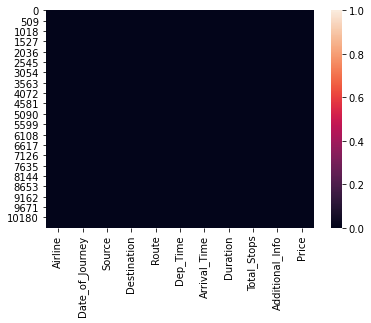

In [9]:
#checking null values using heat map
sns.heatmap(df_train.isnull())

In [10]:
#checking null values
df_train.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [11]:
df_train.dropna(inplace=True)

In [12]:
df_train.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

<AxesSubplot:>

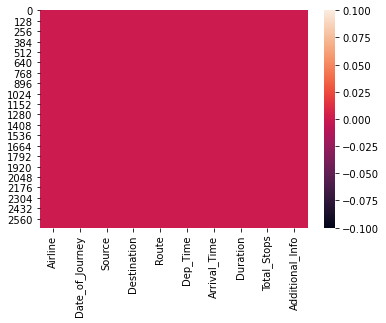

In [13]:
#checking null values using heat map
sns.heatmap(df_test.isnull())

In [14]:
df_test.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
dtype: int64

we can see no null values left for now

In [15]:
df_train["Journey_day"] = pd.to_datetime(df_train.Date_of_Journey, format="%d/%m/%Y").dt.day

In [16]:
df_train["Journey_month"] = pd.to_datetime(df_train.Date_of_Journey, format="%d/%m/%Y").dt.month

In [17]:
df_train.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3


In [18]:
#we have converted date of journey into integers, Now we can drop it
df_train.drop(["Date_of_Journey"],axis = 1, inplace= True)

In [19]:
df_test["Journey_day"] = pd.to_datetime(df_test.Date_of_Journey, format="%d/%m/%Y").dt.day

In [20]:
df_test["Journey_month"] = pd.to_datetime(df_test.Date_of_Journey, format="%d/%m/%Y").dt.month

In [21]:
df_test.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Journey_day,Journey_month
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info,6,6
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info,12,5
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included,21,5
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info,21,5
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info,24,6


In [22]:
#Since we have converted date of journey into integers, Now we can drop it

df_test.drop(["Date_of_Journey"],axis = 1, inplace= True)

In [23]:
df_test

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Journey_day,Journey_month
0,Jet Airways,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info,6,6
1,IndiGo,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info,12,5
2,Jet Airways,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included,21,5
3,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info,21,5
4,Air Asia,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info,24,6
...,...,...,...,...,...,...,...,...,...,...,...
2666,Air India,Kolkata,Banglore,CCU → DEL → BLR,20:30,20:25 07 Jun,23h 55m,1 stop,No info,6,6
2667,IndiGo,Kolkata,Banglore,CCU → BLR,14:20,16:55,2h 35m,non-stop,No info,27,3
2668,Jet Airways,Delhi,Cochin,DEL → BOM → COK,21:50,04:25 07 Mar,6h 35m,1 stop,No info,6,3
2669,Air India,Delhi,Cochin,DEL → BOM → COK,04:00,19:15,15h 15m,1 stop,No info,6,3


In [24]:
#Extracting Hours in train data set
df_train["Dep_Hour"] = pd.to_datetime(df_train.Dep_Time).dt.hour

In [25]:
#Extracting Minutes train data set  
df_train["Dep_min"] = pd.to_datetime(df_train.Dep_Time).dt.minute  

In [26]:
#Extracting Hours in test  data
df_test["Dep_Hour"] = pd.to_datetime(df_test.Dep_Time).dt.hour

In [27]:
#Extracting Minutes in test data
df_test["Dep_min"] = pd.to_datetime(df_test.Dep_Time).dt.minute                                    

In [28]:
#we have converted Departure time into integers, Now we can drop it
df_train.drop(["Dep_Time"],axis = 1, inplace= True)

df_test.drop(["Dep_Time"],axis = 1, inplace= True)

In [29]:
#Extracting Hours in train data set
df_train["Arrival_Hour"] = pd.to_datetime(df_train.Arrival_Time).dt.hour

In [30]:
#Extracting Minutes in train data set 
df_train["Arrival_min"] = pd.to_datetime(df_train.Arrival_Time).dt.minute

In [31]:
#Extracting Hours in test data set
df_test["Arrival_Hour"] = pd.to_datetime(df_test.Arrival_Time).dt.hour

In [32]:
#Extracting Minutes in test data set
df_test["Arrival_min"] = pd.to_datetime(df_test.Arrival_Time).dt.minute

In [33]:
#we have converted Arrival time into integers, Now we can drop it
df_train.drop(["Arrival_Time"],axis = 1, inplace= True)

df_test.drop(["Arrival_Time"],axis = 1, inplace= True)

In [34]:
df_train.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_Hour,Dep_min,Arrival_Hour,Arrival_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,6,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,5,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,1,3,16,50,21,35


In [35]:
df_test.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Journey_day,Journey_month,Dep_Hour,Dep_min,Arrival_Hour,Arrival_min
0,Jet Airways,Delhi,Cochin,DEL → BOM → COK,10h 55m,1 stop,No info,6,6,17,30,4,25
1,IndiGo,Kolkata,Banglore,CCU → MAA → BLR,4h,1 stop,No info,12,5,6,20,10,20
2,Jet Airways,Delhi,Cochin,DEL → BOM → COK,23h 45m,1 stop,In-flight meal not included,21,5,19,15,19,0
3,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,13h,1 stop,No info,21,5,8,0,21,0
4,Air Asia,Banglore,Delhi,BLR → DEL,2h 50m,non-stop,No info,24,6,23,55,2,45


In [46]:
# Assigning and converting Duration column into list for train data
duration = list(df_train["Duration"])

for i in range(len(duration)):
    if len(duration[i].split()) != 2:    # Check if duration contains only hour or mins
        if "h" in duration[i]:
            duration[i] = duration[i].strip() + " 0m"   # Adds 0 minute
        else:
            duration[i] = "0h " + duration[i]           # Adds 0 hour

duration_hours = []
duration_mins = []
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep = "h")[0]))    # Extract hours from duration
    duration_mins.append(int(duration[i].split(sep = "m")[0].split()[-1]))   # Extracts only minutes from duration

In [47]:
print(len(duration_hours))
print(len(duration_mins))

10682
10682


In [48]:
df_train["Duration_hours"] = duration_hours
df_train["Duration_mins"] = duration_mins

In [49]:
# Assigning and converting Duration column into list for test data set
duration = list(df_test["Duration"])

for i in range(len(duration)):
    if len(duration[i].split()) != 2:    # Check if duration contains only hour or mins
        if "h" in duration[i]:
            duration[i] = duration[i].strip() + " 0m"   # Adds 0 minute
        else:
            duration[i] = "0h " + duration[i]           # Adds 0 hour

duration_hours = []
duration_mins = []
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep = "h")[0]))    # Extract hours from duration
    duration_mins.append(int(duration[i].split(sep = "m")[0].split()[-1]))   # Extracts only minutes from duration


In [44]:
print(len(duration_hours))
print(len(duration_mins))

2671
2671


In [50]:
df_test["Duration_hours"] = duration_hours
df_test["Duration_mins"] = duration_mins

In [51]:
df_train.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_Hour,Dep_min,Arrival_Hour,Arrival_min,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,1,3,16,50,21,35,4,45


In [52]:
df_test.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Journey_day,Journey_month,Dep_Hour,Dep_min,Arrival_Hour,Arrival_min,Duration_hours,Duration_mins
0,Jet Airways,Delhi,Cochin,DEL → BOM → COK,10h 55m,1 stop,No info,6,6,17,30,4,25,10,55
1,IndiGo,Kolkata,Banglore,CCU → MAA → BLR,4h,1 stop,No info,12,5,6,20,10,20,4,0
2,Jet Airways,Delhi,Cochin,DEL → BOM → COK,23h 45m,1 stop,In-flight meal not included,21,5,19,15,19,0,23,45
3,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,13h,1 stop,No info,21,5,8,0,21,0,13,0
4,Air Asia,Banglore,Delhi,BLR → DEL,2h 50m,non-stop,No info,24,6,23,55,2,45,2,50


## Visualization

<AxesSubplot:xlabel='Airline', ylabel='count'>

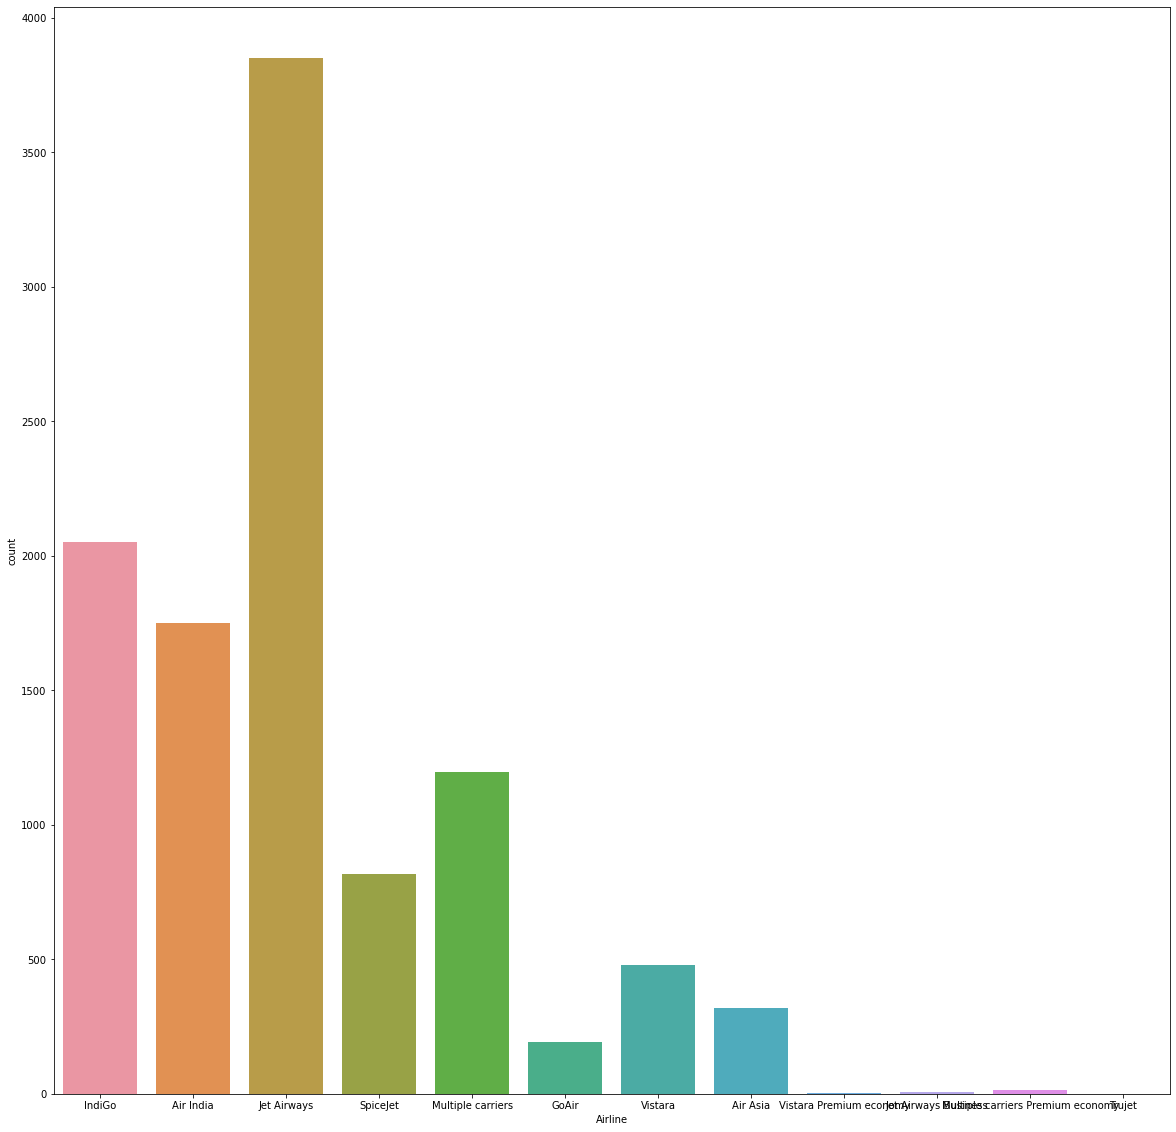

In [53]:
plt.subplots(figsize=(20,20))
sns.countplot(df_train['Airline'])

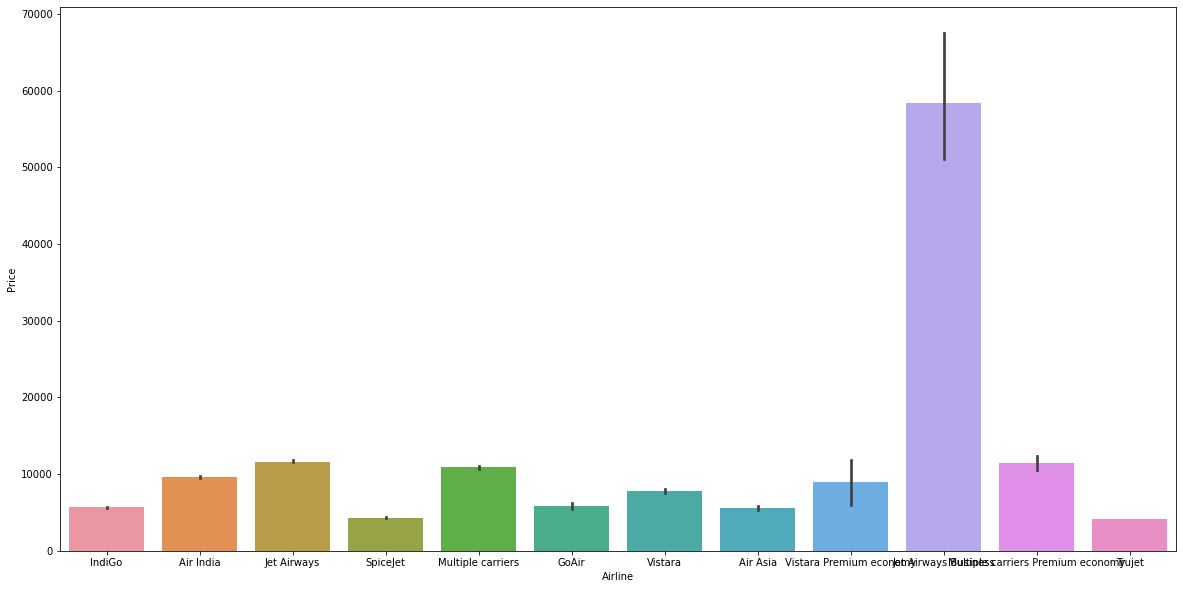

In [54]:
plt.figure(figsize=(20,10))
sns.barplot(x="Airline",y="Price",data=df_train)
plt.show()

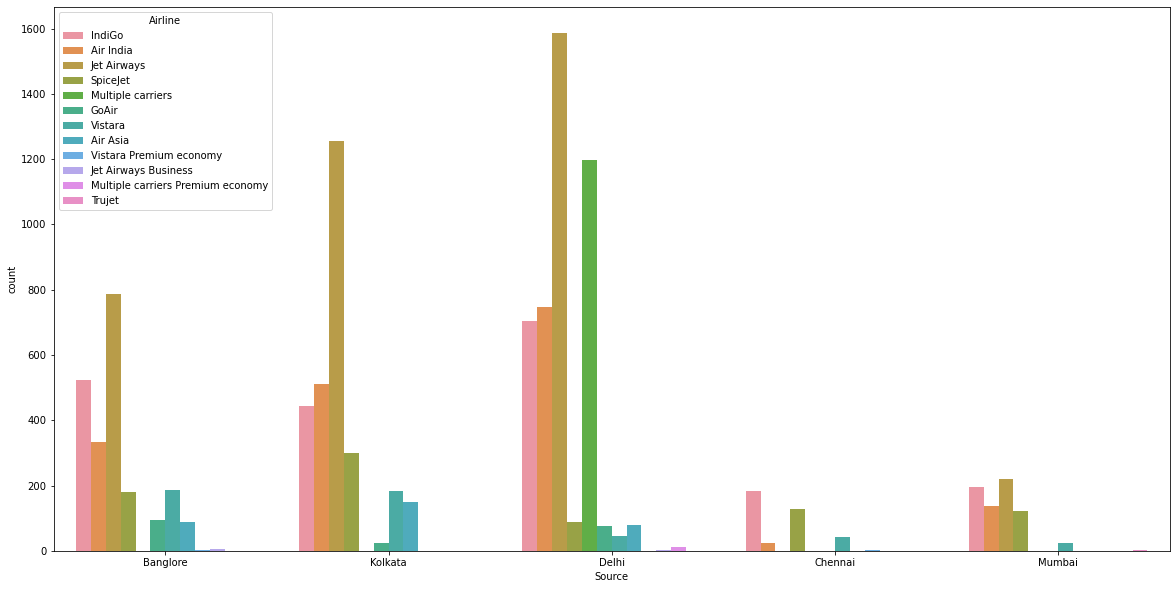

In [55]:
plt.figure(figsize=(20,10))
sns.countplot(x="Source",hue="Airline",data=df_train)
plt.show()

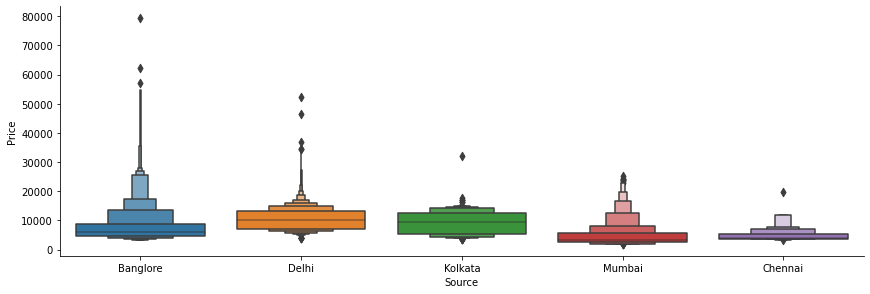

In [56]:
sns.catplot(y = "Price", x = "Source", data = df_train.sort_values("Price", ascending = False), kind="boxen", height = 4, aspect = 3)
plt.show()

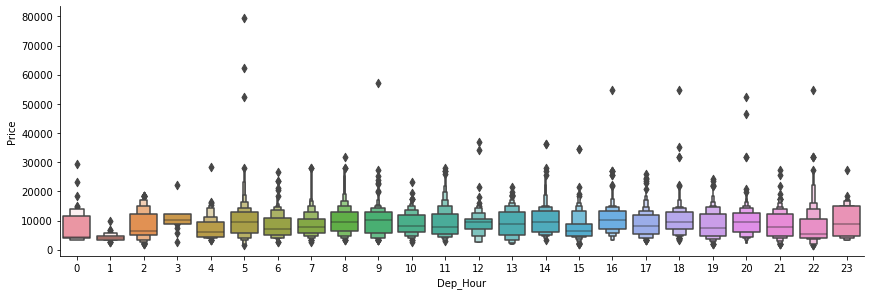

In [57]:
sns.catplot(y = "Price", x = "Dep_Hour", data = df_train.sort_values("Price", ascending = False), kind="boxen", height = 4, aspect = 3)
plt.show()

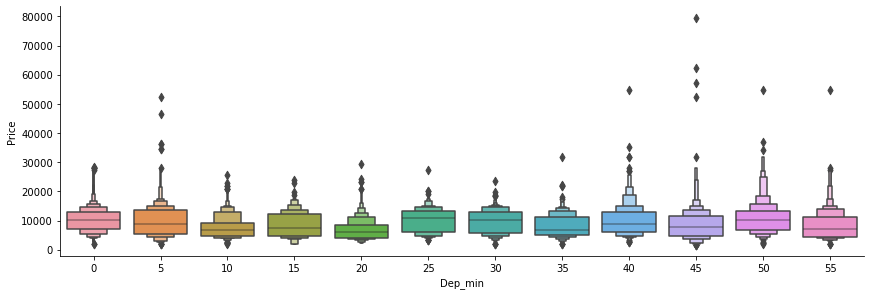

In [58]:
sns.catplot(y = "Price", x = "Dep_min", data = df_train.sort_values("Price", ascending = False), kind="boxen", height = 4, aspect = 3)
plt.show()

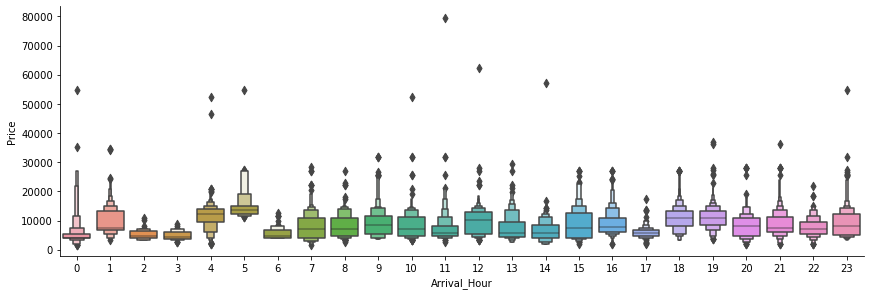

In [59]:
sns.catplot(y = "Price", x = "Arrival_Hour", data = df_train.sort_values("Price", ascending = False), kind="boxen", height = 4, aspect = 3)
plt.show()

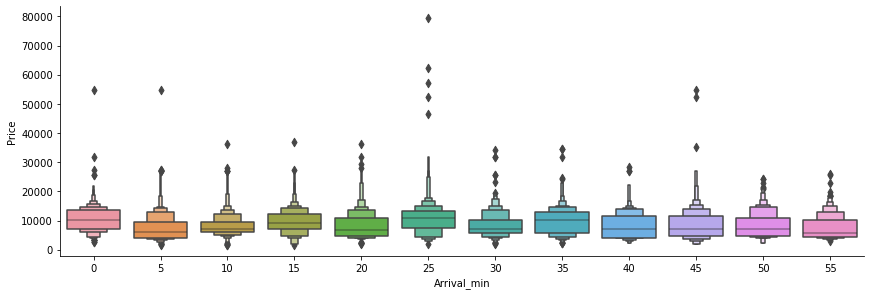

In [60]:
sns.catplot(y = "Price", x = "Arrival_min", data = df_train.sort_values("Price", ascending = False), kind="boxen", height = 4, aspect = 3)
plt.show()

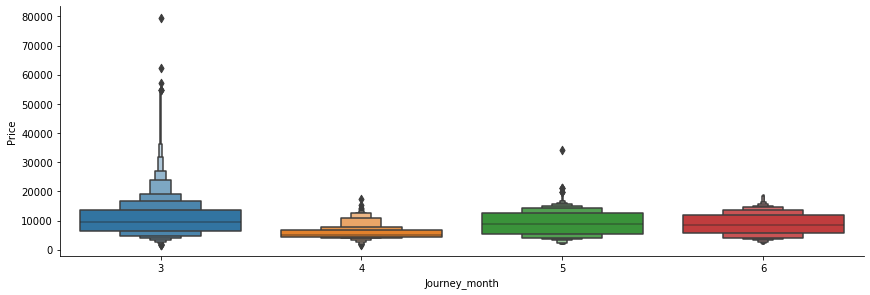

In [61]:
sns.catplot(y = "Price", x = "Journey_month", data = df_train.sort_values("Price", ascending = False), kind="boxen", height = 4, aspect = 3)
plt.show()

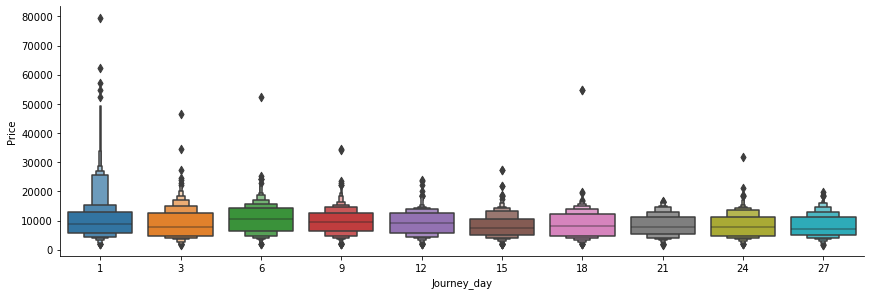

In [62]:
sns.catplot(y = "Price", x = "Journey_day", data = df_train.sort_values("Price", ascending = False), kind="boxen", height = 4, aspect = 3)
plt.show()

{'bodies': [<matplotlib.collections.PolyCollection at 0x1ccc6bed550>],
 'cmaxes': <matplotlib.collections.LineCollection at 0x1ccc6bedac0>,
 'cmins': <matplotlib.collections.LineCollection at 0x1ccc6beda00>,
 'cbars': <matplotlib.collections.LineCollection at 0x1ccc6bed790>}

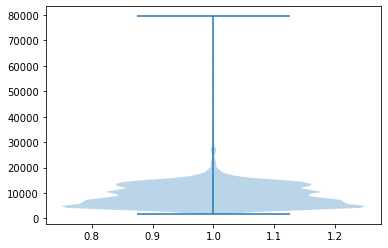

In [63]:
plt.violinplot(df_train["Price"])

{'bodies': [<matplotlib.collections.PolyCollection at 0x1ccc4f8a4c0>],
 'cmaxes': <matplotlib.collections.LineCollection at 0x1ccc4f8a4f0>,
 'cmins': <matplotlib.collections.LineCollection at 0x1ccc4f8a700>,
 'cbars': <matplotlib.collections.LineCollection at 0x1ccc4f8a9d0>}

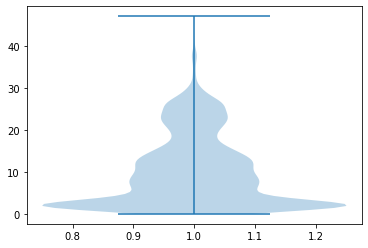

In [64]:
plt.violinplot(df_train["Duration_hours"])

{'bodies': [<matplotlib.collections.PolyCollection at 0x1ccc4e80b20>],
 'cmaxes': <matplotlib.collections.LineCollection at 0x1ccc4e809a0>,
 'cmins': <matplotlib.collections.LineCollection at 0x1ccc4e801c0>,
 'cbars': <matplotlib.collections.LineCollection at 0x1ccc4e80460>}

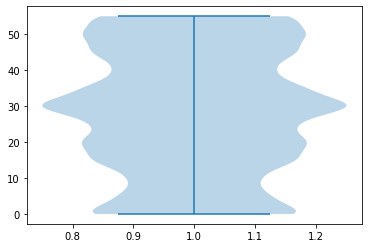

In [65]:
plt.violinplot(df_train["Duration_mins"])

{'bodies': [<matplotlib.collections.PolyCollection at 0x1ccc6efafa0>],
 'cmaxes': <matplotlib.collections.LineCollection at 0x1ccc6efae20>,
 'cmins': <matplotlib.collections.LineCollection at 0x1ccc6eeb490>,
 'cbars': <matplotlib.collections.LineCollection at 0x1ccc6eeb790>}

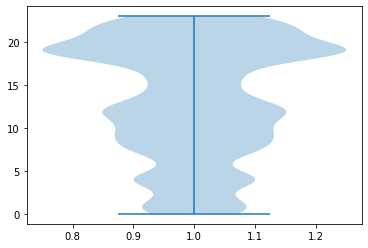

In [66]:
plt.violinplot(df_train["Arrival_Hour"])

{'bodies': [<matplotlib.collections.PolyCollection at 0x1ccc6ec9610>],
 'cmaxes': <matplotlib.collections.LineCollection at 0x1ccc6ec9460>,
 'cmins': <matplotlib.collections.LineCollection at 0x1ccc6ec94c0>,
 'cbars': <matplotlib.collections.LineCollection at 0x1ccc6ec9ac0>}

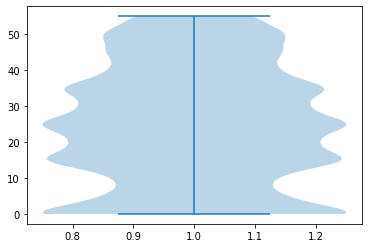

In [67]:
plt.violinplot(df_train["Arrival_min"])

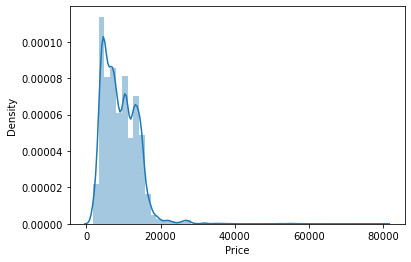

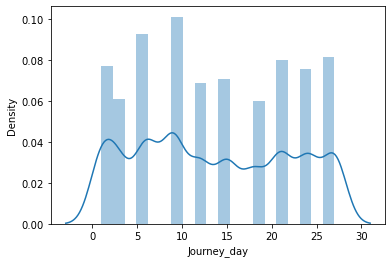

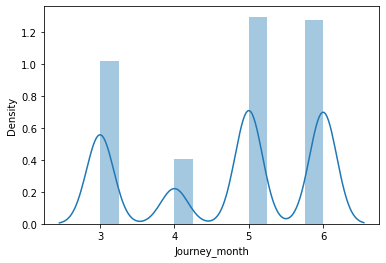

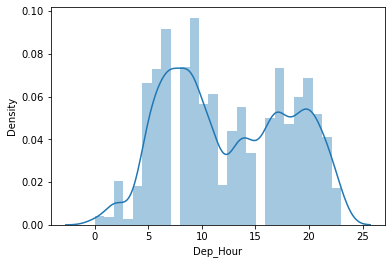

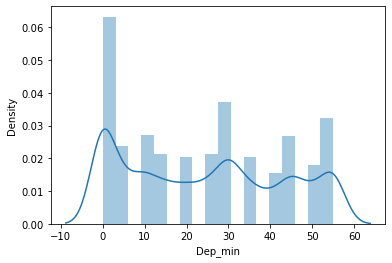

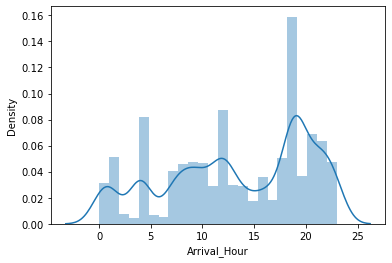

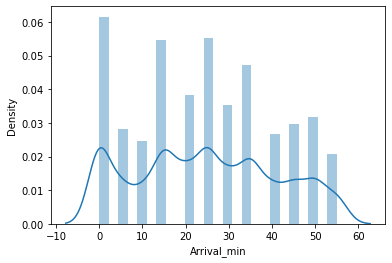

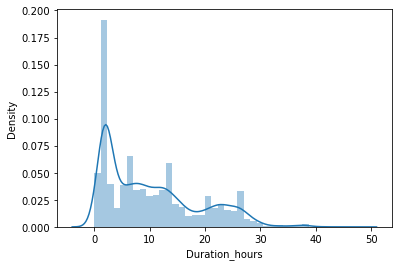

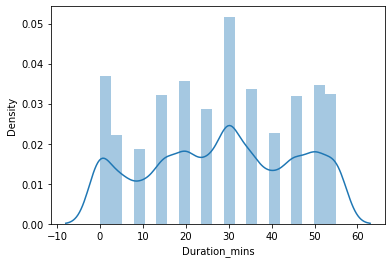

In [68]:
for i in df_train.describe().columns:
    sns.distplot(df_train[i])
    plt.show()

Price                AxesSubplot(0.125,0.657941;0.0945122x0.222059)
Journey_day       AxesSubplot(0.238415,0.657941;0.0945122x0.222059)
Journey_month     AxesSubplot(0.351829,0.657941;0.0945122x0.222059)
Dep_Hour          AxesSubplot(0.465244,0.657941;0.0945122x0.222059)
Dep_min           AxesSubplot(0.578659,0.657941;0.0945122x0.222059)
Arrival_Hour      AxesSubplot(0.692073,0.657941;0.0945122x0.222059)
Arrival_min       AxesSubplot(0.805488,0.657941;0.0945122x0.222059)
Duration_hours       AxesSubplot(0.125,0.391471;0.0945122x0.222059)
Duration_mins     AxesSubplot(0.238415,0.391471;0.0945122x0.222059)
dtype: object

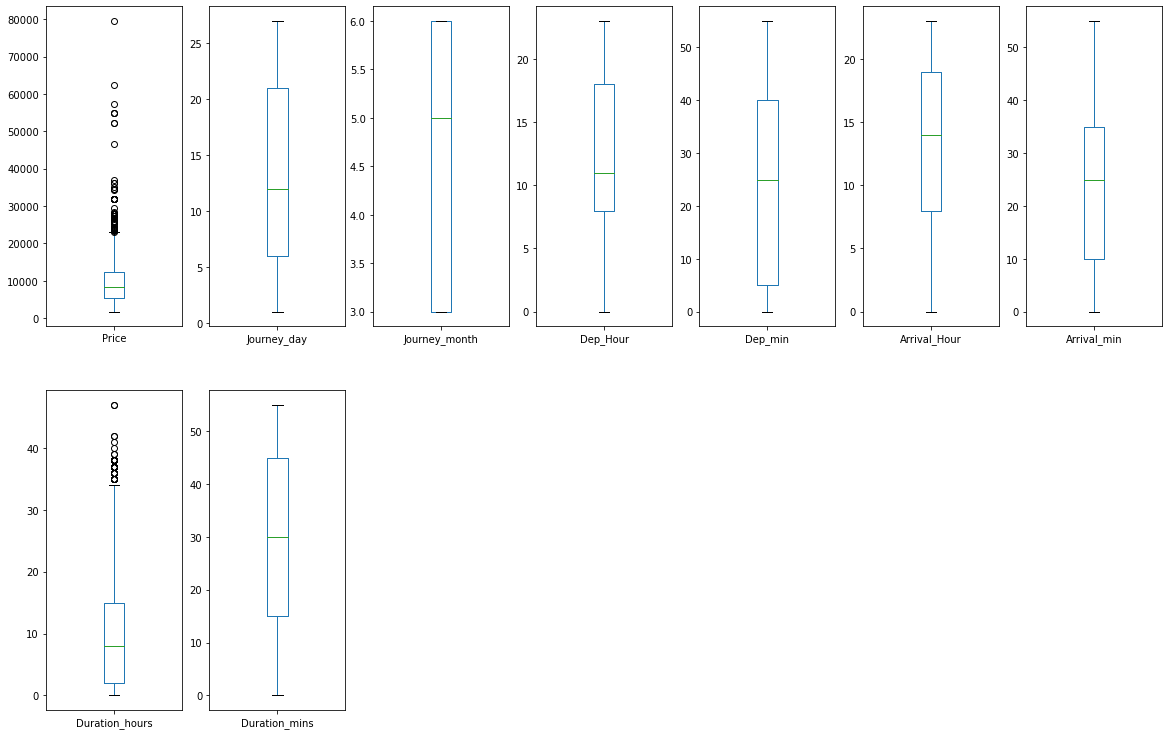

In [69]:
df_train.plot(kind='box',subplots=True,layout=(3,7),figsize=(20,20))

we can say that many outliers are present in Age,Fnlwgt,capital gain, capital loss and hours per week

array([[<AxesSubplot:title={'center':'Price'}>,
        <AxesSubplot:title={'center':'Journey_day'}>,
        <AxesSubplot:title={'center':'Journey_month'}>],
       [<AxesSubplot:title={'center':'Dep_Hour'}>,
        <AxesSubplot:title={'center':'Dep_min'}>,
        <AxesSubplot:title={'center':'Arrival_Hour'}>],
       [<AxesSubplot:title={'center':'Arrival_min'}>,
        <AxesSubplot:title={'center':'Duration_hours'}>,
        <AxesSubplot:title={'center':'Duration_mins'}>]], dtype=object)

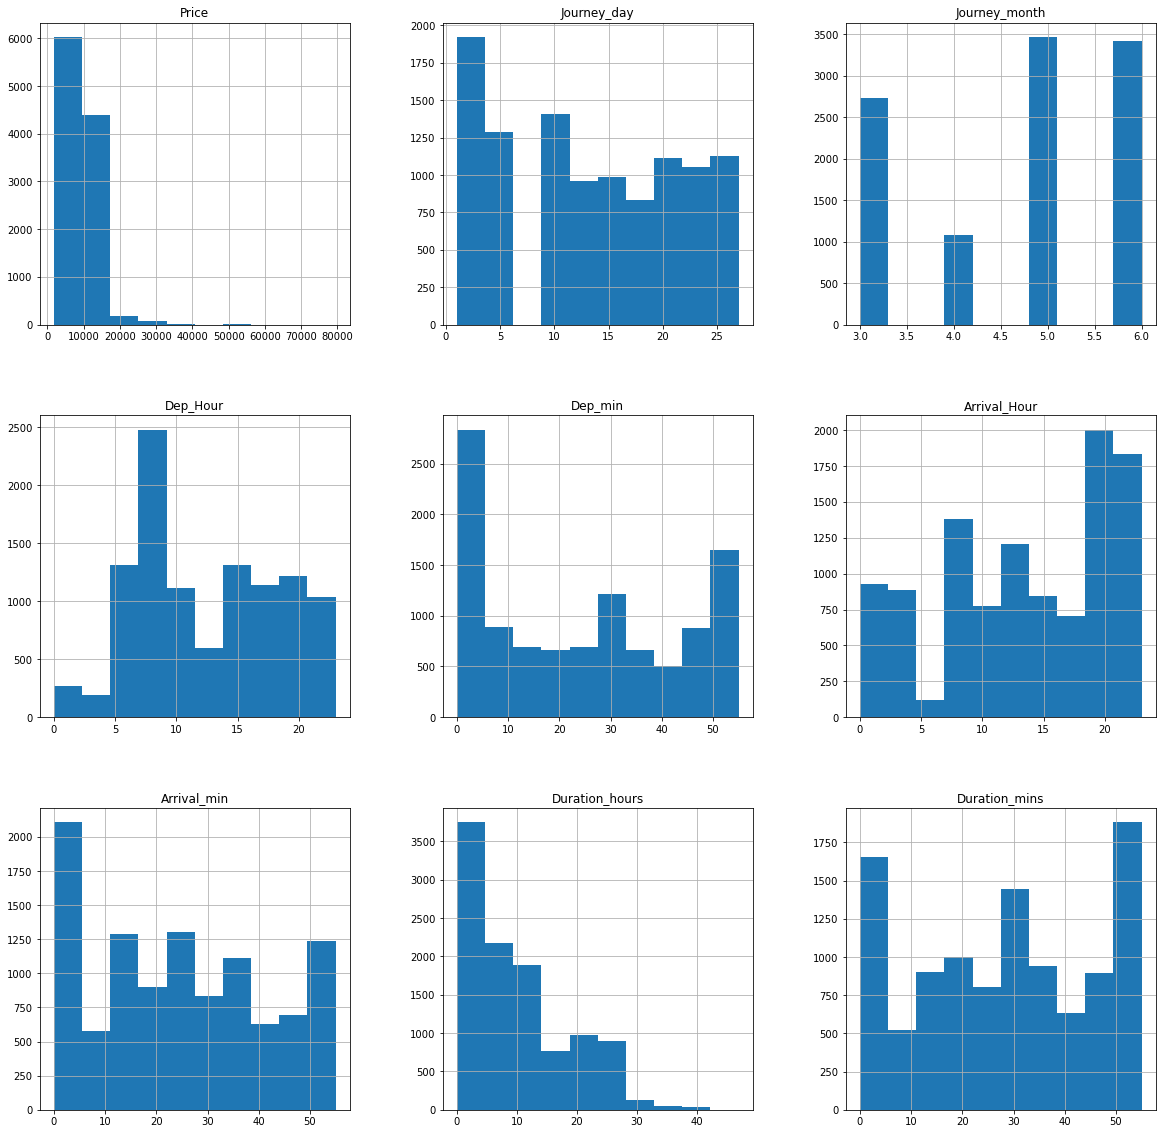

In [70]:
df_train.hist(figsize=(20,20))

# Encoding

In [71]:
Airline = df_train[["Airline"]]
Airline = pd.get_dummies(Airline, drop_first= True)
Airline.head()


,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy
0,0,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0


In [72]:
Source = df_train[["Source"]]
Source = pd.get_dummies(Source, drop_first= True)
Source.head()

,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,0,0,0,0
1,0,0,1,0
2,0,1,0,0
3,0,0,1,0
4,0,0,0,0


In [73]:
Destination = df_train[["Destination"]]
Destination = pd.get_dummies(Destination, drop_first = True)
Destination.head()

,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,0,0,0,1
1,0,0,0,0,0
2,1,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,1


In [74]:
df_train.replace({"non-stop": 0, "1 stop": 1, "2 stops": 2, "3 stops": 3, "4 stops": 4}, inplace = True)

In [75]:
df1_train = pd.concat([df_train, Airline, Source, Destination], axis = 1)
df1_train.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,0,No info,3897,24,3,...,0,0,0,0,0,0,0,0,0,1
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2,No info,7662,1,5,...,0,0,0,1,0,0,0,0,0,0
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2,No info,13882,9,6,...,0,0,1,0,0,1,0,0,0,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1,No info,6218,12,5,...,0,0,0,1,0,0,0,0,0,0
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1,No info,13302,1,3,...,0,0,0,0,0,0,0,0,0,1


In [76]:
df1_train.drop(["Airline", "Source", "Destination","Route","Additional_Info"], axis = 1, inplace = True)

In [77]:
df1_train.head()

,Duration,Total_Stops,Price,Journey_day,Journey_month,Dep_Hour,Dep_min,Arrival_Hour,Arrival_min,Duration_hours,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,2h 50m,0,3897,24,3,22,20,1,10,2,...,0,0,0,0,0,0,0,0,0,1
1,7h 25m,2,7662,1,5,5,50,13,15,7,...,0,0,0,1,0,0,0,0,0,0
2,19h,2,13882,9,6,9,25,4,25,19,...,0,0,1,0,0,1,0,0,0,0
3,5h 25m,1,6218,12,5,18,5,23,30,5,...,0,0,0,1,0,0,0,0,0,0
4,4h 45m,1,13302,1,3,16,50,21,35,4,...,0,0,0,0,0,0,0,0,0,1


In [78]:
df1_train.shape

(10682, 31)

In [79]:
Airline = df_test[["Airline"]]
Airline = pd.get_dummies(Airline, drop_first= True)
Airline.head()

,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Vistara,Airline_Vistara Premium economy
0,0,0,0,1,0,0,0,0,0,0
1,0,0,1,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0
3,0,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0


In [80]:
Source = df_test[["Source"]]
Source = pd.get_dummies(Source, drop_first= True)
Source.head()

,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,0,1,0,0
1,0,0,1,0
2,0,1,0,0
3,0,1,0,0
4,0,0,0,0


In [81]:
Destination = df_test[["Destination"]]
Destination = pd.get_dummies(Destination, drop_first = True)
Destination.head()

,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,1,0,0,0,0
1,0,0,0,0,0
2,1,0,0,0,0
3,1,0,0,0,0
4,0,1,0,0,0


In [82]:
df_test.replace({"non-stop": 0, "1 stop": 1, "2 stops": 2, "3 stops": 3, "4 stops": 4}, inplace = True)

In [83]:
df1_test = pd.concat([df_test, Airline, Source, Destination], axis = 1)

In [84]:
df1_test.drop(["Airline","Duration" ,"Source", "Destination","Route","Additional_Info"], axis = 1, inplace = True)

In [85]:
df1_test.head()

,Total_Stops,Journey_day,Journey_month,Dep_Hour,Dep_min,Arrival_Hour,Arrival_min,Duration_hours,Duration_mins,Airline_Air India,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,1,6,6,17,30,4,25,10,55,0,...,0,0,1,0,0,1,0,0,0,0
1,1,12,5,6,20,10,20,4,0,0,...,0,0,0,1,0,0,0,0,0,0
2,1,21,5,19,15,19,0,23,45,0,...,0,0,1,0,0,1,0,0,0,0
3,1,21,5,8,0,21,0,13,0,0,...,0,0,1,0,0,1,0,0,0,0
4,0,24,6,23,55,2,45,2,50,0,...,0,0,0,0,0,0,1,0,0,0


In [86]:
df1_train.describe()

,Total_Stops,Price,Journey_day,Journey_month,Dep_Hour,Dep_min,Arrival_Hour,Arrival_min,Duration_hours,Duration_mins,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
count,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,...,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000
mean,0.824190,9087.214567,13.509081,4.708575,12.491013,24.409287,13.349186,24.690601,10.244898,28.326624,...,0.000281,0.035667,0.424640,0.268770,0.065250,0.424640,0.118424,0.065250,0.035667,0.087250
std,0.675229,4611.548810,8.479363,1.164408,5.748820,18.767801,6.859317,16.506808,8.494916,16.945817,...,0.016757,0.185468,0.494311,0.443341,0.246978,0.494311,0.323124,0.246978,0.185468,0.282214
min,0.000000,1759.000000,1.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,5277.000000,6.000000,3.000000,8.000000,5.000000,8.000000,10.000000,2.000000,15.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,8372.000000,12.000000,5.000000,11.000000,25.000000,14.000000,25.000000,8.000000,30.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,12373.000000,21.000000,6.000000,18.000000,40.000000,19.000000,35.000000,15.000000,45.000000,...,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,4.000000,79512.000000,27.000000,6.000000,23.000000,55.000000,23.000000,55.000000,47.000000,55.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


<function matplotlib.pyplot.show(close=None, block=None)>

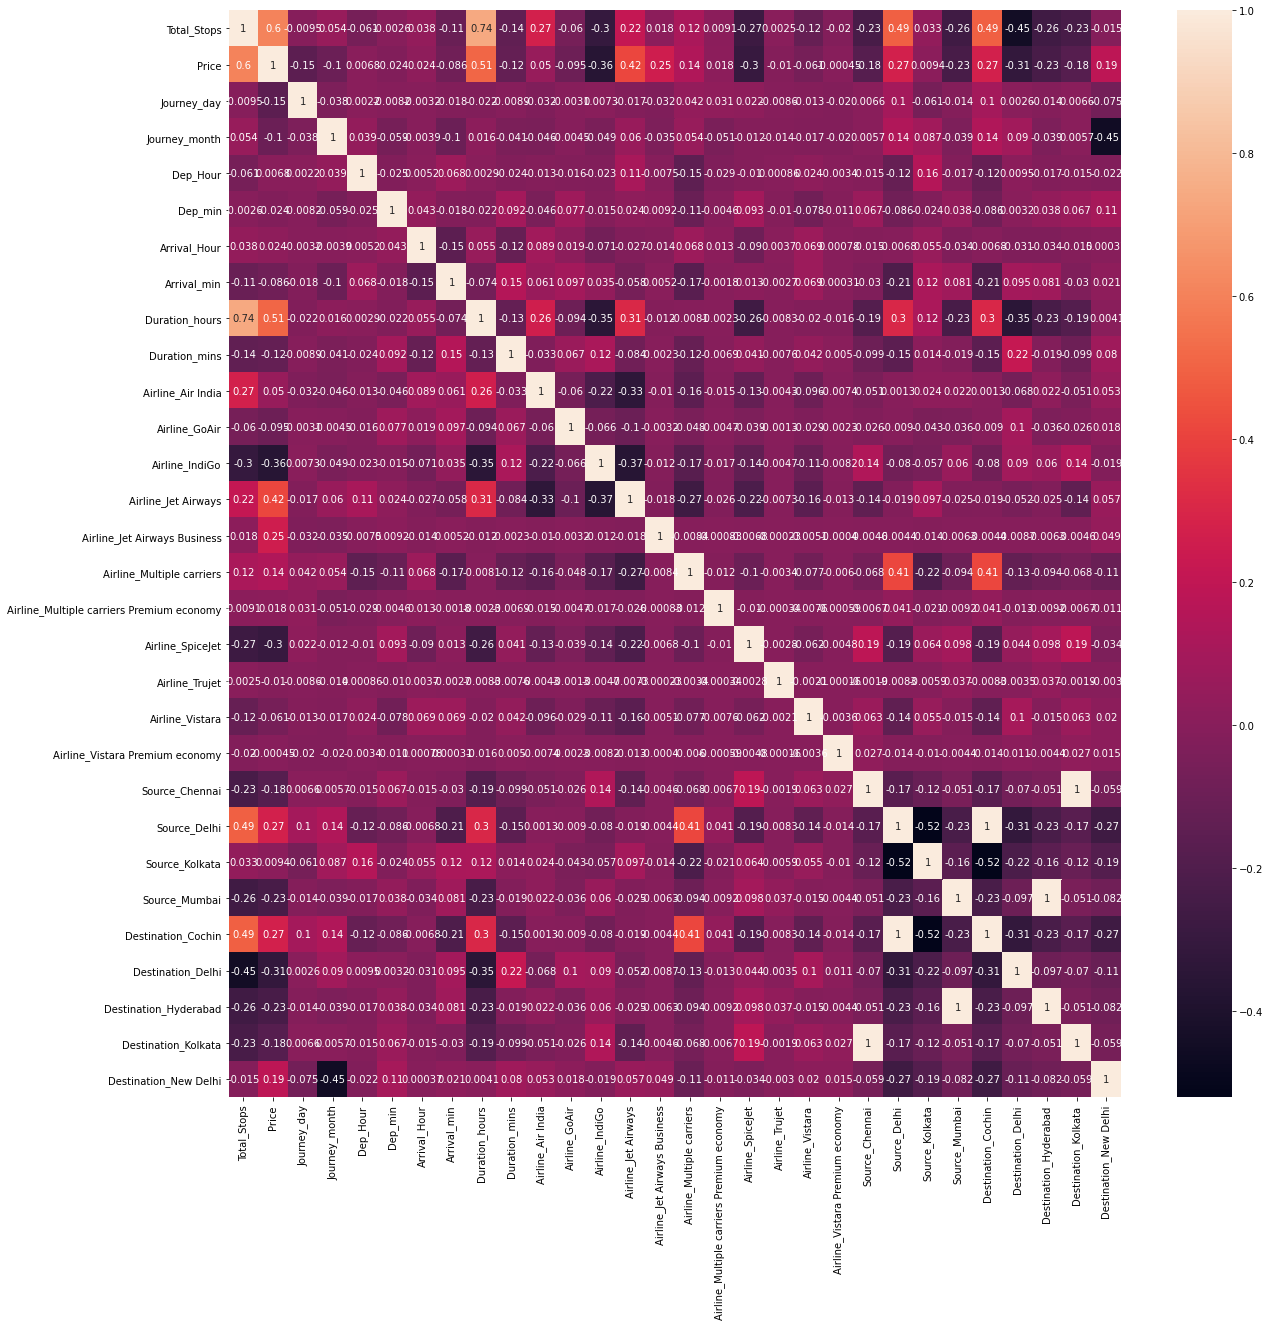

In [87]:
#Observing corelation between the columns with the help of heatmap
plt.figure(figsize=(20,20))
sns.heatmap(df1_train.corr(),annot=True)
plt.show

In [88]:
df1_test.corr()

,Total_Stops,Journey_day,Journey_month,Dep_Hour,Dep_min,Arrival_Hour,Arrival_min,Duration_hours,Duration_mins,Airline_Air India,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
Total_Stops,1.000000,-0.016959,0.016992,-0.108388,0.009389,0.033027,-0.113292,0.734442,-0.116024,0.305269,...,-0.033939,-0.210736,0.465671,0.053317,-0.273551,0.465671,-0.454973,-0.273551,-0.210736,-0.008501
Journey_day,-0.016959,1.000000,-0.023324,-0.023386,-0.010510,0.019613,-0.003485,-0.025496,0.018353,-0.016734,...,0.001936,0.019295,0.057564,-0.055326,-0.024992,0.057564,0.035279,-0.024992,0.019295,-0.043111
Journey_month,0.016992,-0.023324,1.000000,0.015798,-0.109383,-0.000679,-0.148013,-0.016043,-0.059019,-0.030281,...,-0.040185,0.029263,0.137241,0.067976,-0.028438,0.137241,0.109024,-0.028438,0.029263,-0.459130
Dep_Hour,-0.108388,-0.023386,0.015798,1.000000,-0.034524,0.000147,0.066751,-0.019739,-0.022836,-0.058501,...,0.006724,-0.010867,-0.167791,0.166871,0.012869,-0.167791,0.031698,0.012869,-0.010867,-0.008468
Dep_min,0.009389,-0.010510,-0.109383,-0.034524,1.000000,0.046824,-0.020065,0.020907,0.091169,-0.006465,...,0.028845,0.079943,-0.063457,-0.048981,0.037013,-0.063457,-0.023997,0.037013,0.079943,0.133999
Arrival_Hour,0.033027,0.019613,-0.000679,0.000147,0.046824,1.000000,-0.136215,0.052277,-0.124326,0.052411,...,0.013280,0.006153,-0.015264,0.036062,-0.031102,-0.015264,-0.028204,-0.031102,0.006153,0.026833
Arrival_min,-0.113292,-0.003485,-0.148013,0.066751,-0.020065,-0.136215,1.000000,-0.079484,0.175481,0.078494,...,0.004801,-0.052274,-0.233382,0.117665,0.072541,-0.233382,0.122859,0.072541,-0.052274,0.048981
Duration_hours,0.734442,-0.025496,-0.016043,-0.019739,0.020907,0.052277,-0.079484,1.000000,-0.091420,0.286680,...,-0.026721,-0.165919,0.284651,0.129587,-0.239885,0.284651,-0.348281,-0.239885,-0.165919,0.010496
Duration_mins,-0.116024,0.018353,-0.059019,-0.022836,0.091169,-0.124326,0.175481,-0.091420,1.000000,0.007538,...,0.023055,-0.094041,-0.162208,0.015827,-0.012030,-0.162208,0.209336,-0.012030,-0.094041,0.084868
Airline_Air India,0.305269,-0.016734,-0.030281,-0.058501,-0.006465,0.052411,0.078494,0.286680,0.007538,1.000000,...,-0.012157,-0.044936,-0.005340,0.025223,0.037115,-0.005340,-0.078707,0.037115,-0.044936,0.052410


### Dealing with Outliers

In [89]:
df1_train.drop(["Duration"], axis = 1, inplace = True)

In [90]:
df1_train.head()

,Total_Stops,Price,Journey_day,Journey_month,Dep_Hour,Dep_min,Arrival_Hour,Arrival_min,Duration_hours,Duration_mins,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,3897,24,3,22,20,1,10,2,50,...,0,0,0,0,0,0,0,0,0,1
1,2,7662,1,5,5,50,13,15,7,25,...,0,0,0,1,0,0,0,0,0,0
2,2,13882,9,6,9,25,4,25,19,0,...,0,0,1,0,0,1,0,0,0,0
3,1,6218,12,5,18,5,23,30,5,25,...,0,0,0,1,0,0,0,0,0,0
4,1,13302,1,3,16,50,21,35,4,45,...,0,0,0,0,0,0,0,0,0,1


In [91]:
from scipy.stats import zscore
z=np.abs(zscore(df1_train))
df=df1_train[(z<3).all(axis=1)]

In [92]:
df1_test.head()

,Total_Stops,Journey_day,Journey_month,Dep_Hour,Dep_min,Arrival_Hour,Arrival_min,Duration_hours,Duration_mins,Airline_Air India,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,1,6,6,17,30,4,25,10,55,0,...,0,0,1,0,0,1,0,0,0,0
1,1,12,5,6,20,10,20,4,0,0,...,0,0,0,1,0,0,0,0,0,0
2,1,21,5,19,15,19,0,23,45,0,...,0,0,1,0,0,1,0,0,0,0
3,1,21,5,8,0,21,0,13,0,0,...,0,0,1,0,0,1,0,0,0,0
4,0,24,6,23,55,2,45,2,50,0,...,0,0,0,0,0,0,1,0,0,0


### Splitting the dataset into dependent and independent 

In [93]:
x=df1_train.drop('Price',axis=1)
y=df1_train['Price']

In [94]:
x.head()

,Total_Stops,Journey_day,Journey_month,Dep_Hour,Dep_min,Arrival_Hour,Arrival_min,Duration_hours,Duration_mins,Airline_Air India,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,24,3,22,20,1,10,2,50,0,...,0,0,0,0,0,0,0,0,0,1
1,2,1,5,5,50,13,15,7,25,1,...,0,0,0,1,0,0,0,0,0,0
2,2,9,6,9,25,4,25,19,0,0,...,0,0,1,0,0,1,0,0,0,0
3,1,12,5,18,5,23,30,5,25,0,...,0,0,0,1,0,0,0,0,0,0
4,1,1,3,16,50,21,35,4,45,0,...,0,0,0,0,0,0,0,0,0,1


In [95]:
df1_test.head()

,Total_Stops,Journey_day,Journey_month,Dep_Hour,Dep_min,Arrival_Hour,Arrival_min,Duration_hours,Duration_mins,Airline_Air India,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,1,6,6,17,30,4,25,10,55,0,...,0,0,1,0,0,1,0,0,0,0
1,1,12,5,6,20,10,20,4,0,0,...,0,0,0,1,0,0,0,0,0,0
2,1,21,5,19,15,19,0,23,45,0,...,0,0,1,0,0,1,0,0,0,0
3,1,21,5,8,0,21,0,13,0,0,...,0,0,1,0,0,1,0,0,0,0
4,0,24,6,23,55,2,45,2,50,0,...,0,0,0,0,0,0,1,0,0,0


In [96]:
y.head()

0     3897
1     7662
2    13882
3     6218
4    13302
Name: Price, dtype: int64

In [97]:
x.shape

(10682, 29)

In [98]:
y.shape

(10682,)

In [99]:
y=y.values.reshape(-1,1)

In [100]:
y.shape

(10682, 1)

In [101]:
from sklearn.ensemble import ExtraTreesRegressor
selection = ExtraTreesRegressor()
selection.fit(x, y)

ExtraTreesRegressor()

In [102]:
selection.feature_importances_

array([2.34754529e-01, 1.44251321e-01, 5.22507562e-02, 2.44863644e-02,
       2.07610302e-02, 2.77987710e-02, 1.93984098e-02, 1.22559885e-01,
       1.75883853e-02, 8.87764893e-03, 2.21529935e-03, 1.77238197e-02,
       1.37941587e-01, 6.74112355e-02, 1.75251876e-02, 8.48006528e-04,
       2.78310796e-03, 1.10522585e-04, 4.90932184e-03, 9.29748050e-05,
       5.50170587e-04, 1.12446070e-02, 3.46447057e-03, 6.65677561e-03,
       7.53164863e-03, 1.40475594e-02, 6.88700436e-03, 5.70230740e-04,
       2.47593698e-02])

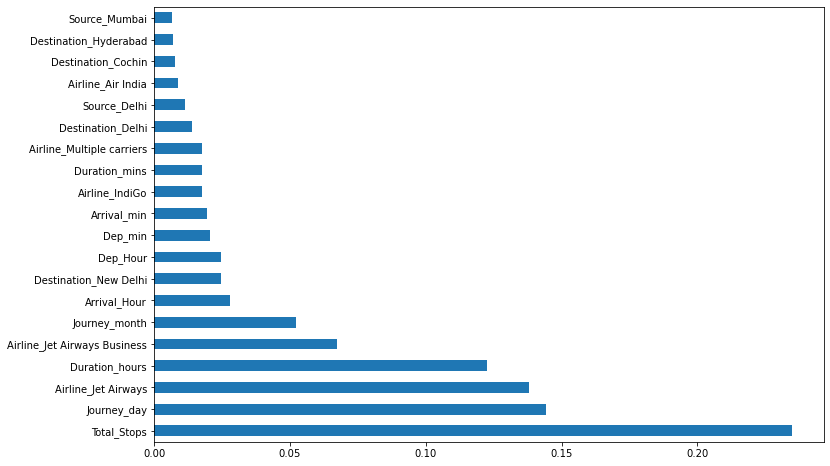

In [103]:
plt.figure(figsize = (12,8))
feat_importances = pd.Series(selection.feature_importances_, index=x.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

In [104]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.svm import SVR
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [105]:
def maxr2_score(regr,x,y):
    max_r_score=0
    for i in range(42,100):
        x_train,x_test,y_train,y_test=train_test_split(x,y,random_state= i ,test_size=0.20)
        regr.fit(x_train,y_train)
        y_pred=regr.predict(x_test)
        r2_scr=r2_score(y_test,y_pred)
        
        if r2_scr>max_r_score:
            max_r_score=r2_scr
            final_i=i
    print("max r2 score corresponding to",final_i,"is",max_r_score)
    return final_i

In [106]:
lreg=LinearRegression()
i=maxr2_score(lreg,x,y)

max r2 score corresponding to 57 is 0.6797926449118867


In [107]:
print("Mean r2 score for Linear Regression:",cross_val_score(lreg,x,y,cv=5,scoring="r2").mean())
print("standard deviation in r2 score for Linear Regression",cross_val_score(lreg,x,y,cv=5,scoring="r2").std())

Mean r2 score for Linear Regression: 0.6199027318916419
standard deviation in r2 score for Linear Regression 0.019257859247068604


### Finding Best Parameters by Using GridSearchCV

In [108]:
knr=KNeighborsRegressor()
parameters={'n_neighbors':range(1,10)}
gd=GridSearchCV(knr,parameters)
gd.fit(x,y)
print(gd.best_params_)
print("\n")

lsreg=Lasso()
parameters={"alpha":[0.001,0.01,0.1,1]}
gd=GridSearchCV(lsreg,parameters)
gd.fit(x,y)
print(gd.best_params_)
print("\n")

dtr=DecisionTreeRegressor()
parameters={'criterion':('mse', 'friedman_mse', 'mae')}
gd=GridSearchCV(dtr,parameters)
gd.fit(x,y)
print(gd.best_params_)
print("\n")

enr=ElasticNet()
parametors={"alpha":[0.001,0.01,0.1,1]}
gd=GridSearchCV(enr,parametors)
gd.fit(x,y)
print(gd.best_params_)
print("\n")

rfr=RandomForestRegressor()
parameters={"n_estimators":[10,50,100,120,150],"max_features": ["auto", "sqrt", "log2"]}
gd=GridSearchCV(rfr,parameters,cv=5)
gd.fit(x,y)
print(gd.best_params_)
print("\n")

svr=SVR()
parameters={"kernel" : ( "Linear" ,"rbf" ) ,"C": [1,10]}
gd=GridSearchCV(svr,parameters)
gd.fit(x,y)
print(gd.best_params_)
print("\n")

gbr=GradientBoostingRegressor()
parameters={"learning_rate":[0.001,0.01,0.1,1],"n_estimators":[10,50,100,120,150]}
gd=GridSearchCV(gbr,parameters)
gd.fit(x,y)
print(gd.best_params_)
print("\n")

{'n_neighbors': 3}


{'alpha': 0.1}


{'criterion': 'mse'}


{'alpha': 0.001}


{'max_features': 'auto', 'n_estimators': 100}


{'C': 10, 'kernel': 'rbf'}


{'learning_rate': 1, 'n_estimators': 150}




In [109]:
knn=KNeighborsRegressor(n_neighbors=3)
i=maxr2_score(knn,x,y)
print("\n")

print("Mean r2 score for KNeighbor  Regression:",cross_val_score(knr,x,y,cv=5,scoring="r2").mean())
print("standard deviation in r2 score for KNeighbor   Regression",cross_val_score(knr,x,y,cv=5,scoring="r2").std())
print("\n______________________________\n")

lsreg=Lasso(alpha=0.1)
i=maxr2_score(lsreg,x,y)
print("\n")

print("Mean r2 score for Lasso Regression:",cross_val_score(lsreg,x,y,cv=5,scoring="r2").mean())
print("standard deviation in r2 score for Lasso Regression",cross_val_score(lsreg,x,y,cv=5,scoring="r2").std())
print("\n_______________________________\n")


dtr=DecisionTreeRegressor(criterion = 'mse')
i=maxr2_score(dtr,x,y)
print("\n")

print("Mean r2 score for DecisionTreeRegressor :",cross_val_score(dtr,x,y,cv=5,scoring="r2").mean())
print("standard deviation in r2 score for DecisionTreeRegressor",cross_val_score(dtr,x,y,cv=5,scoring="r2").std())
print("\n_______________________________\n")

enr=ElasticNet(alpha=0.001)
i=maxr2_score(enr,x,y)
print("\n")

print("Mean r2 score for Elastic net Regression:",cross_val_score(enr,x,y,cv=5,scoring="r2").mean())
print("standard deviation in r2 score for Elastic net Regression",cross_val_score(enr,x,y,cv=5,scoring="r2").std())
print("\n___________________________\n")


rfr=RandomForestRegressor(max_features='auto',n_estimators=150)
i=maxr2_score(rfr,x,y)
print("\n")

print("Mean r2 score for RandomForestRegressor :",cross_val_score(rfr,x,y,cv=5,scoring="r2").mean())
print("standard deviation in r2 score for RandomForestRegressor ",cross_val_score(rfr,x,y,cv=5,scoring="r2").std())
print("\n_______________________\n")


gbr=GradientBoostingRegressor(learning_rate=1,n_estimators=150)
i=maxr2_score(gbr,x,y)
print("\n")

print("Mean r2 score for gradient boosting Regression:",cross_val_score(gbr,x,y,cv=5,scoring="r2").mean())
print("standard deviation in r2 score for gradient boosting Regression",cross_val_score(gbr,x,y,cv=5,scoring="r2").std())
print("\n_______________________\n")


svr=SVR(C= 10, kernel= 'rbf')
i=maxr2_score(svr,x,y)
print("\n")

print("Mean r2 score for SVR:",cross_val_score(gbr,x,y,cv=5,scoring="r2").mean())
print("standard deviation in r2 score for SVR",cross_val_score(gbr,x,y,cv=5,scoring="r2").std())
print("\n________________________\n")

max r2 score corresponding to 62 is 0.6439350943328421


Mean r2 score for KNeighbor  Regression: 0.5850009290076714
standard deviation in r2 score for KNeighbor   Regression 0.022190756995764248

______________________________

max r2 score corresponding to 57 is 0.67959979048739


Mean r2 score for Lasso Regression: 0.6199085514739766
standard deviation in r2 score for Lasso Regression 0.019217149796267416

_______________________________

max r2 score corresponding to 73 is 0.7812396295705126


Mean r2 score for DecisionTreeRegressor : 0.7091031378261168
standard deviation in r2 score for DecisionTreeRegressor 0.028684315780584443

_______________________________

max r2 score corresponding to 71 is 0.6373726020449727


Mean r2 score for Elastic net Regression: 0.607337181271878
standard deviation in r2 score for Elastic net Regression 0.010740226571354976

___________________________

max r2 score corresponding to 59 is 0.8402600320028455


Mean r2 score for RandomForestRegressor :

In [110]:
x_train, x_test, y_train, y_test = train_test_split(x,y,random_state = 58,test_size=0.20)
gbr.fit(x_train,y_train)
y_pred=gbr.predict(x_test)

In [111]:
print("RMSE is: ",np.sqrt(mean_squared_error(y_test,y_pred)))
print("r2_score is: ",r2_score(y_test,y_pred))

RMSE is:  1827.3095550151
r2_score is:  0.8537837881831203


In [112]:
prediction = gbr.predict(x_test)

In [113]:
r2_score(y_test,prediction)

0.8537837881831203

In [114]:
import joblib
model=joblib.dump(gbr,"Flight_Price-pred.pkl")

In [115]:
model=joblib.load("Flight_Price-pred.pkl")